<a href="https://colab.research.google.com/github/imad3k/AppliedML_Assignment2/blob/main/dsba6156_inclass_assignment2_iahmad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSBA 6156: in-class Assignment 2
# Imad Ahmad

# Load Google Colab

In [1]:
# Connect Google Drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Change directory in Google Drive to ColabData

%cd /content/drive/My Drive/ColabData/DSBA6156/inclass_assignment03

/content/drive/My Drive/ColabData/DSBA6156/inclass_assignment03


# Load Libraries

In [3]:
# Load Numpy and Pandas
import numpy as np
import pandas as pd

# Auto Data

Consider the Automobile data set from the UCI machine learning repository https://archive.ics.uci.edu/ml/datasets/Automobile. Note that you have to convert string values in certain columns to their numerical values (Hint: Label Encoder library from scikit-learn can be of assistance!). Remove the instances that have NA values in any of the columns. The Target variable is the attribute “symbolling”. Split the given dataset into test and train. Using KNN Regression algorithm and setting the nearest neighbor value as 3 (k=3), conduct 5-fold cross validation, calculate variance and the Residual Sum of Squares for the KNN regression Model.

In [4]:
# Read in the auto data file
# na_values = '?'

auto_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 
             'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 
             'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
             'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

auto_df = pd.read_csv('imports-85.data', header=None, sep = ',', names = auto_names, na_values="?")

# Print Data Frame
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [5]:
# Checking to see which columns are categorical variables
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
auto_df.shape

(205, 26)

### Drop NA values

In [7]:
# Drop NA values before applying label encoder

auto_df.dropna(inplace = True)
auto_df.shape

(159, 26)

### Convert columns that use strings to represent numberical values with the help of LabelEncoder()

In [8]:
# Import label encoder 
from sklearn import preprocessing

# Load the label_encoder 
label_encoder = preprocessing.LabelEncoder()

# Encode numerical labels for for columns that report numbers but using string values variables
auto_df['num-of-doors']= label_encoder.fit_transform(auto_df['num-of-doors']) 
auto_df['num-of-cylinders']= label_encoder.fit_transform(auto_df['num-of-cylinders']) 

# Double check if label encoding has worked
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,audi,gas,std,0,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,audi,gas,turbo,0,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,bmw,gas,std,1,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


### Use dummy coding to represent the categorical variables

In [12]:
# For the rest of the categorical variables I am using dummy coding to represent the categories
col_to_dummy = ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']

# Change above columns to dummies
auto_df = pd.get_dummies(auto_df, columns=col_to_dummy)

# Checking to see if dummy coding works
auto_df.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,...,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi
3,2,164.0,0,99.8,176.6,66.2,54.3,2337,2,109,...,0,1,0,0,0,0,0,0,1,0
4,2,164.0,0,99.4,176.6,66.4,54.3,2824,1,136,...,0,1,0,0,0,0,0,0,1,0
6,1,158.0,0,105.8,192.7,71.4,55.7,2844,1,136,...,0,1,0,0,0,0,0,0,1,0
8,1,158.0,0,105.8,192.7,71.4,55.9,3086,1,131,...,0,1,0,0,0,0,0,0,1,0
10,2,192.0,1,101.2,176.8,64.8,54.3,2395,2,108,...,0,1,0,0,0,0,0,0,1,0


### Split the dataset into X (features) and Y (target)

In [13]:
# Split the data into Y (Target) and X (Variables)

Y = auto_df['symboling']
X = auto_df.drop(['symboling'], axis = 1)

### Apply MinMaxScaler to normalize the numerical values

In [14]:
# Scale the numerical values (important because KNN is based on distance measures)

# Import MinMaxScaler from Sklearn
from sklearn.preprocessing import MinMaxScaler

# Scale the numerical values (X) 
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Train Test Split

In [15]:
# Split the data into a train/test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 42)

### Cross Validation with Knn Regression 

In [70]:
# Load KNN Regression Library & Metrics from Sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load Cross Validation
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate


# Initiate the KNN Regression model with n_neighbors=3
knn_regression = KNeighborsRegressor(n_neighbors=3, weights='uniform')

# Fit the model
knn_regression.fit(x_train, y_train)

# Generate model predictions
predY = knn_regression.predict(x_test)

#############################################
########### Cross Validation ################

# Use Cross Validation (cv=5) to get predictions
knn_cv_predictions = cross_val_predict(knn_regression, X_scaled, Y, cv=5)

# Knn CV Model Predictions
# print('Knn Cross Validation Model predictions are: ', '\n', knn_cv_predictions, '\n')

# Cross Validation Knn Model Scores: <-- default score is R^2 according to documentation
knn_cv_scores = cross_val_score(knn_regression, X_scaled, Y, cv=5)

### CV Knn Regression Model Performance
* Variance
* Sum of Squares

In [72]:
print('The default score for KNeighborsRegressor is R^2. \nIt represents the proportion of the variance for a dependent variable thats explained by an independent variable\n')

# Variance Scores for the CV Knn regression Model:
print('Variance Scores:')
print('CV Knn Model R^2 scores: ', knn_cv_scores)
print('Mean variance score is: ', knn_cv_scores.mean())

print('\n')

# Residual Sum of Squares for the CV Knn regression Model:
print('Sum of Squares:')
print("Model Residual sum of squares: %.2f" % np.mean((knn_cv_predictions - Y) ** 2), '\n')

# Another way to do this is:
print('Method 2 using mean_squared_error(): %.2f' % mean_squared_error(Y, knn_cv_predictions), '\n')


The default score for KNeighborsRegressor is R^2. 
It represents the proportion of the variance for a dependent variable thats explained by an independent variable

Variance Scores:
CV Knn Model R^2 scores:  [-0.81218638  0.39871537  0.12856566 -0.03680225  0.41041041]
Mean variance score is:  0.01774056015678329


Sum of Squares:
Model Residual sum of squares: 1.12 

Method 2 using mean_squared_error(): 1.12 



### Visualize the change in Errors as we Change n_neighbors parameter

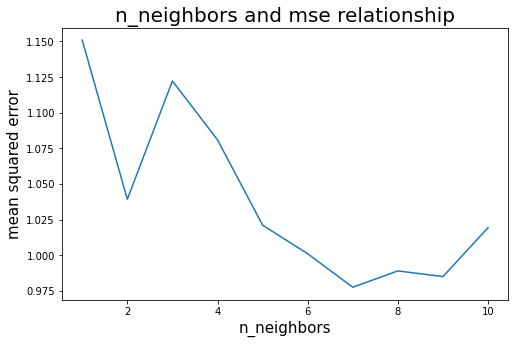

In [73]:
# Testing erros for different values of Neighbors
import matplotlib.pyplot as plt

error = []
for k in range(1,11):
    knn = KNeighborsRegressor(n_neighbors=k)
    y_pred = cross_val_predict(knn, X_scaled, Y, cv=5)
    error.append(mean_squared_error(Y, y_pred)) 

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), error)
plt.xlabel('n_neighbors', fontsize=15)
plt.ylabel('mean squared error', fontsize=15)
plt.title('n_neighbors and mse relationship', fontsize=20);

# Airfoil Data

Consider the Airfoil Self Noise data set  from  the  UCI  machine  learning repository  
https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise. The target attribute is “Scaled sound pressure 
level”. Using the KNN Regression algorithm and varying the nearest neighbor value from 3 to 6 (k=3, 4, 5, 
6), conduct 5-fold cross validation, and report Residual Sum of Squares and variance score for the KNN 
Regression model. 

### Read in the Airfoil data

In [74]:
# Read in our data file

airfoil_df = pd.read_csv('airfoil_self_noise.dat', header = None, sep='\t', 
                         names = ['frequency','angle','chordlength','velocity','thinkness','soundlevel'])

# Print Data
airfoil_df.head()

,frequency,angle,chordlength,velocity,thinkness,soundlevel
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


### Split the data into X (features) and Y (target)

In [75]:
# Split the data into X(variables) & Y(target)
# The target according to the the website is the last column

X = airfoil_df.iloc[:, 0:5]
Y = airfoil_df.iloc[:, 5]

### Create a Pipeline to connect: MinMax Scaler + KNeighborsRegressor + GridSearch

In [76]:
# To find out which n_neighbors is the best, we will grid search
# And make a pipeline to apply the scaling function + knn regression to put into our grid search

from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV

In [78]:
# Create a pipeline to combine Scaling operation & KNN Regression model
knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsRegressor())])

# Set the parameters needed for the grid search
params = [{'knn__n_neighbors': [3, 4, 5, 6],
         'knn__weights': ['uniform', 'distance']}]

# Create the Grid Search with cross validation
gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='neg_mean_squared_error',
                      cv=5)

# Fit the grid search on our data
gs_knn.fit(X, Y)
print('The best parameters for running the Knn model are:\n')
gs_knn.best_params_

The best parameters for running the Knn model are:



{'knn__n_neighbors': 3, 'knn__weights': 'distance'}

In [79]:
# Using the best parameters from the grid search, we can now run the Knn model

# Initiate the KNN Regression model with n_neighbors=3
knn_regression = KNeighborsRegressor(n_neighbors=3, weights='distance')

# Use Cross Validation (cv=5) to get predictions
cv_knn_predictions = cross_val_predict(knn_regression, X, Y, cv=5)

# Model scores
cv_knn_model_scores = cross_val_score(knn_regression, X, Y, cv=5)


### Model Performance Metrics: Variance & Sum of Squares

In [80]:
# Variance Scores for the CV Knn regression Model:
print('Variance Scores:')
print('Model R^2 scores: ', cv_knn_model_scores)
print('Mean variance score is: ', cv_knn_model_scores.mean())

print('\n')

# Residual Sum of Squares for the CV Knn regression Model:
print('Sum of Squares:')
print("Model Residual sum of squares: %.2f" % np.mean((cv_knn_predictions - Y) ** 2), '\n')

# Another way to do this is:
print('Method 2 using mean_squared_error(): %.2f' % mean_squared_error(Y, cv_knn_predictions), '\n')

Variance Scores:
Model R^2 scores:  [-0.01131929  0.18880622  0.20985263 -1.0920923   0.33768781]
Mean variance score is:  -0.07341298770230617


Sum of Squares:
Model Residual sum of squares: 47.91 

Method 2 using mean_squared_error(): 47.91 



# Electric Household Power
Consider the electric household power data set from the UCI machine learning repository     
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption. Drop the 
columns “Date” and “Time” from the dataset. Perform K means Clustering on the dataset with varying k 
values. Use the knee-bend method to find the best value “k”. Print the value of CENTROIDS and plot the 
clusters. 

In [25]:
# Read in our data file
# If you have a specific 'character' for na values, use: na_values =
# If you want to rename the columns, uses: names = [pass in a list of names]

hh_power = pd.read_csv('household_power_consumption.txt', sep=";")

# Print Data
hh_power.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


# Forest Fires
Consider the forest fire data set from the UCI machine learning repository     
https://archive.ics.uci.edu/ml/datasets/Forest+Fires.  Note  that  you  have  to  convert  string  values  in 
certain columns to their numerical values (Hint: Label Encoder library from scikit-learn can be of 
assistance!). Using Linear Regression conduct 5-fold cross validation and calculate accuracy, variance score, 
and residual sum of squares for Linear Regression. The target attribute is “area”. 

In [ ]:
# Read in our data file
# If you have a specific 'character' for na values, use: na_values =
# If you want to rename the columns, uses: names = [pass in a list of names]

ff = pd.read_csv('forestfires.csv')

# Print Data
ff.head()

# Wine Dataset
Consider the Wine Quality data set from the UCI machine learning repository     
https://archive.ics.uci.edu/ml/datasets/Wine+Quality. Use the winequality-red.csv for building and 
evaluating the model. The Target variable is the attribute  'quality'. Using Logistic Regression and Support 
vector  machines  algorithm  conduct  a  classification  experiment  on  the  dataset.  Perform  5-fold  cross 
validation and calculate F1, precision, and recall for logistic regression and SVM using the SVC library. 

In [ ]:
# Read in our data file
# If you have a specific 'character' for na values, use: na_values =
# If you want to rename the columns, uses: names = [pass in a list of names]

white = pd.read_csv('winequality-white.csv', sep = ";")
red = pd.read_csv('winequality-red.csv', sep = ";")

# Print Data
white.head()


In [ ]:
red.head()